In [1]:
import keras # Keras is a high-level neural networks API
from keras.datasets import cifar10 # CIFAR10 small image classification
from keras.preprocessing.image import ImageDataGenerator # Generate batches of tensor image data with real-time data augmentation
from keras.models import Sequential # sequential models
from keras.layers import Dense, Dropout, Activation, Flatten 
from keras.layers import Conv2D, MaxPooling2D # characteristic retrieve and narrow time complexity
import os
import matplotlib.pyplot as plt

/Users/crown/anaconda3/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/crown/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


In [2]:
# initiate variables
batch_size  = 32
num_classes = 10
epochs      = 20
num_predictions = 20

# The data, shuffled and split between train and test sets:
# x_train, x_test: uint8 array of RGB image data with shape (num_samples, 3, 32, 32).
# y_train, y_test: uint8 array of category labels (integers in range 0-9) with shape (num_samples,).
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shapes:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shapes: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [3]:
# print sample data 
print(x_train[0])
print(y_train[0])
image_dictionary = {0:'airplane', 1:'automobile', 2:'bird', 3:'cat', 4:'deer',
                    5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}
print(image_dictionary[float(y_train[0])])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]
[6]
frog


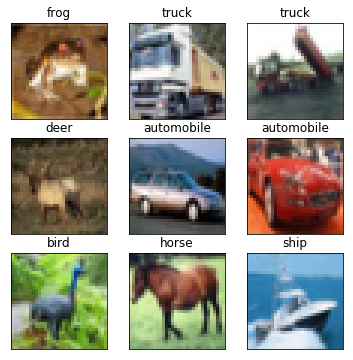

In [4]:
# show sample images
fig = plt.figure()
fig.set_size_inches(6, 6)
for i in range(0, 9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i], cmap='binary')
    plt.title(image_dictionary[float(y_train[i])])
    plt.xticks([]) # Disable xticks:
    plt.yticks([]) # Disable yticks:

In [5]:
print(y_train[0])
# Converts a class vector (integers) to binary class matrix.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train[0])

[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [6]:
# CNN layer model
model = Sequential()
# first layer
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
# second layer
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
# reduce complexity
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# third layer
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
#forth layer
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
# reduce complexity
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# flatten neure
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [7]:
# optimizer SGD (Stochastic gradient descent optimizer)
opt = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

# train model
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [8]:
history = model.fit(x_train, y_train, 
                    batch_size=batch_size, 
                    epochs=epochs, 
                    validation_data=(x_test, y_test), 
                    shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 190s 4ms/step - loss: 1.7905 - acc: 0.3349 - val_loss: 1.3800 - val_acc: 0.5004
Epoch 2/20
50000/50000 [==============================] - 188s 4ms/step - loss: 1.3564 - acc: 0.5086 - val_loss: 1.1972 - val_acc: 0.5790
Epoch 3/20
50000/50000 [==============================] - 184s 4ms/step - loss: 1.2117 - acc: 0.5667 - val_loss: 1.0478 - val_acc: 0.6266
Epoch 4/20
50000/50000 [==============================] - 185s 4ms/step - loss: 1.1069 - acc: 0.6074 - val_loss: 1.0636 - val_acc: 0.6289
Epoch 5/20
50000/50000 [==============================] - 184s 4ms/step - loss: 1.0348 - acc: 0.6369 - val_loss: 1.0455 - val_acc: 0.6290
Epoch 6/20
50000/50000 [==============================] - 188s 4ms/step - loss: 0.9843 - acc: 0.6554 - val_loss: 0.8957 - val_acc: 0.6891
Epoch 7/20
50000/50000 [==============================] - 186s 4ms/step - loss: 0.9435 - acc: 0.6697 - val_loss: 0.8464 - 

In [10]:
scores = model.evaluate(x_test[:1000], y_test[:1000], verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

1000/1000 [==============================] - 1s 1ms/step
Test loss: 0.7605438504219055
Test accuracy: 0.736


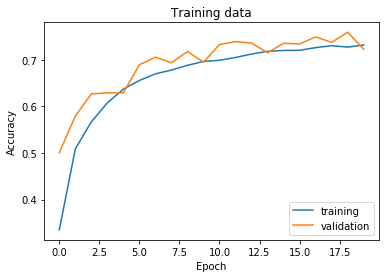

In [12]:
plt.clf()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training data')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', 'validation'], loc='lower right')
plt.show()

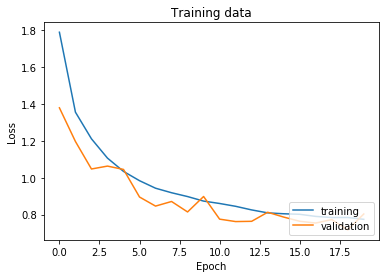

In [13]:
plt.clf()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training data')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'], loc='lower right')
plt.show()

In [14]:
predicted_classes=model.predict_classes(x_test[:1000])

In [15]:
predicted_classes

array([3, 8, 8, 0, 6, 6, 1, 4, 3, 1, 3, 9, 4, 7, 9, 6, 5, 7, 8, 6, 7, 0,
       4, 9, 4, 2, 6, 0, 9, 6, 6, 5, 4, 3, 9, 8, 4, 9, 9, 5, 4, 6, 5, 6,
       0, 9, 3, 3, 7, 6, 9, 8, 7, 3, 8, 8, 4, 3, 6, 4, 7, 5, 6, 1, 6, 6,
       1, 2, 3, 4, 4, 6, 8, 8, 0, 2, 9, 3, 3, 8, 8, 8, 1, 7, 2, 7, 4, 4,
       8, 9, 0, 6, 8, 6, 4, 6, 6, 0, 0, 7, 4, 3, 6, 3, 1, 1, 2, 6, 8, 7,
       4, 0, 6, 6, 1, 4, 0, 4, 6, 7, 8, 4, 1, 2, 8, 6, 8, 6, 3, 2, 4, 1,
       8, 9, 6, 2, 9, 7, 4, 8, 6, 5, 6, 5, 8, 7, 6, 6, 5, 2, 8, 9, 6, 0,
       2, 3, 2, 9, 3, 4, 2, 1, 6, 6, 8, 4, 8, 6, 9, 2, 9, 9, 9, 8, 9, 9,
       3, 7, 5, 0, 0, 5, 2, 6, 3, 8, 6, 3, 3, 0, 6, 8, 0, 1, 4, 2, 8, 3,
       7, 8, 3, 9, 8, 7, 1, 3, 8, 5, 7, 9, 3, 3, 5, 9, 8, 0, 7, 9, 8, 2,
       7, 6, 9, 4, 4, 9, 4, 4, 3, 6, 3, 1, 5, 8, 8, 0, 4, 7, 5, 3, 1, 1,
       8, 9, 0, 6, 1, 8, 2, 2, 7, 5, 9, 9, 4, 0, 6, 0, 8, 9, 8, 1, 3, 3,
       8, 8, 3, 4, 7, 2, 2, 3, 6, 5, 8, 4, 0, 4, 4, 6, 9, 0, 6, 1, 9, 9,
       1, 8, 7, 9, 1, 2, 6, 9, 3, 4, 6, 0, 0, 6, 6,

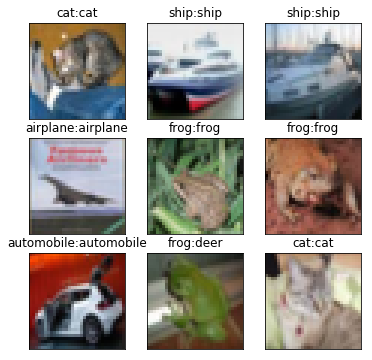

In [16]:
import numpy as np
fig = plt.figure()
fig.set_size_inches(6, 6)
for i in range(0, 9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[i], cmap='binary')
    plt.title(image_dictionary[np.argmax(y_test[i])] + ':' +
              image_dictionary[predicted_classes[i]])
    plt.xticks([])
    plt.yticks([])

In [17]:
scores2 = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores2[0])
print('Test accuracy:', scores2[1])

10000/10000 [==============================] - 12s 1ms/step
Test loss: 0.8034577176094055
Test accuracy: 0.7225
